# Car Price Prediction

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [290]:
df = pd.read_excel(r'C:\Users\HP\Desktop\CarPricePredictionData.xlsx')
df

,Unnamed: 0,Brand,Model,Year Of Purchase,Transmission,Kilometers Drive Till Now,Owner,Feul,EMI,Price Of Car,Downpayment,Location
0,0,Maruti Alto K,VXI Manual,2014,Manual,"40,562 km",1st Owner,Petrol,"6,391/month","2,87,299",Zero downpayment,New Delhi
1,1,Hyundai Grand i,MAGNA 1.1 CRDI Manual,2015,Manual,"62,491 km",2nd Owner,Diesel,"6,947/month","3,12,299",Zero downpayment,New Delhi
2,2,Maruti Swift Dzire,VDI BS IV Manual,2014,Manual,"96,978 km",1st Owner,Diesel,"9,263/month","4,16,399",Zero downpayment,New Delhi
3,3,Maruti Swift,VDI ABS Manual,2015,Manual,"44,638 km",1st Owner,Diesel,"9,621/month","4,32,499",Zero downpayment,New Delhi
4,4,Maruti Alto K,VXI Manual,2019,Manual,"10,395 km",1st Owner,Petrol,"9,503/month","4,27,199",Zero downpayment,New Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...
5760,180,Maruti Alto,LXI Manual,2019,Manual,"29,782 km",2nd Owner,Petrol,"7,641/month","3,43,499",Zero downpayment,Agra
5761,181,Maruti Alto K,VXI Manual,2017,Manual,"50,739 km",1st Owner,Petrol,"7,579/month","3,40,699",Zero downpayment,Agra
5762,182,Maruti Alto K,VXI Manual,2017,Manual,"48,513 km",1st Owner,Petrol,"7,808/month","3,50,999",Zero downpayment,Agra
5763,183,Maruti Alto K,VXI Manual,2017,Manual,"13,916 km",1st Owner,Petrol,"7,679/month","3,45,199",Zero downpayment,Agra


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765 entries, 0 to 5764
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 5765 non-null   int64 
 1   Brand                      5765 non-null   object
 2   Model                      5765 non-null   object
 3   Year Of Purchase           5765 non-null   int64 
 4   Transmission               5689 non-null   object
 5   Kilometers Drive Till Now  5765 non-null   object
 6   Owner                      5765 non-null   object
 7   Feul                       5765 non-null   object
 8   EMI                        5765 non-null   object
 9   Price Of Car               5765 non-null   object
 10  Downpayment                5765 non-null   object
 11  Location                   5765 non-null   object
dtypes: int64(2), object(10)
memory usage: 540.6+ KB


In [292]:
df.isnull().sum()

Unnamed: 0                    0
Brand                         0
Model                         0
Year Of Purchase              0
Transmission                 76
Kilometers Drive Till Now     0
Owner                         0
Feul                          0
EMI                           0
Price Of Car                  0
Downpayment                   0
Location                      0
dtype: int64

In [293]:
df=df.drop(['Unnamed: 0','Downpayment'],axis=1)

In [294]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Brand']=LE.fit_transform(df['Brand'])
df['Model']=LE.fit_transform(df['Model'])
df['Transmission']=LE.fit_transform(df['Transmission'])
df['Owner']=LE.fit_transform(df['Owner'])
df['Feul']=LE.fit_transform(df['Feul'])
df['Location']=LE.fit_transform(df['Location'])

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765 entries, 0 to 5764
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Brand                      5765 non-null   int32 
 1   Model                      5765 non-null   int32 
 2   Year Of Purchase           5765 non-null   int64 
 3   Transmission               5765 non-null   int32 
 4   Kilometers Drive Till Now  5765 non-null   object
 5   Owner                      5765 non-null   int32 
 6   Feul                       5765 non-null   int32 
 7   EMI                        5765 non-null   object
 8   Price Of Car               5765 non-null   object
 9   Location                   5765 non-null   int32 
dtypes: int32(6), int64(1), object(3)
memory usage: 315.4+ KB


In [296]:
df["Kilometers Drive Till Now"]=df["Kilometers Drive Till Now"].str.replace(" km","")
df["EMI"]=df["EMI"].str.replace("/month","")

In [297]:
df["EMI"]=df["EMI"].str.replace(",","")
df["Price Of Car"]=df["Price Of Car"].str.replace(",","")
df["Kilometers Drive Till Now"]=df["Kilometers Drive Till Now"].str.replace(",","")

In [298]:
df['Kilometers Drive Till Now']=df['Kilometers Drive Till Now'].astype(str).astype(int)
df['EMI']=df['EMI'].astype(str).astype(int)
df['Price Of Car']=df['Price Of Car'].astype(str).astype(int)

In [299]:
df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mean())

In [300]:
df.describe()

,Brand,Model,Year Of Purchase,Transmission,Kilometers Drive Till Now,Owner,Feul,EMI,Price Of Car,Location
count,5765.000000,5765.000000,5765.000000,5765.000000,5765.000000,5765.000000,5765.000000,5765.00000,5.765000e+03,5765.000000
mean,54.758023,395.782307,2016.230182,0.867997,48673.436600,0.239376,0.645273,13542.21804,6.087907e+05,5.770512
std,28.915337,190.101152,2.259207,0.375458,33151.768846,0.484611,0.489583,7014.77982,3.153498e+05,3.047433
min,0.000000,0.000000,2007.000000,0.000000,58.000000,0.000000,0.000000,2678.00000,1.203990e+05,0.000000
25%,29.000000,244.000000,2015.000000,1.000000,24667.000000,0.000000,0.000000,9073.00000,4.078990e+05,3.000000
50%,60.000000,437.000000,2016.000000,1.000000,42856.000000,0.000000,1.000000,11674.00000,5.247990e+05,7.000000
75%,74.000000,564.000000,2018.000000,1.000000,66350.000000,0.000000,1.000000,15647.00000,7.033990e+05,8.000000
max,122.000000,681.000000,2021.000000,2.000000,353288.000000,3.000000,3.000000,77991.00000,3.506099e+06,10.000000


In [301]:
df.corr()

,Brand,Model,Year Of Purchase,Transmission,Kilometers Drive Till Now,Owner,Feul,EMI,Price Of Car,Location
Brand,1.000000,0.433497,-0.042248,0.020149,0.113568,-0.021309,-0.084547,-0.100213,-0.100214,-0.009518
Model,0.433497,1.000000,-0.023519,0.068131,-0.011969,-0.043573,-0.013412,-0.168315,-0.168314,-0.018493
Year Of Purchase,-0.042248,-0.023519,1.000000,-0.089959,-0.498360,-0.172511,0.204650,0.368124,0.368124,-0.158338
Transmission,0.020149,0.068131,-0.089959,1.000000,0.066448,-0.045611,-0.049972,-0.337032,-0.337031,-0.051651
Kilometers Drive Till Now,0.113568,-0.011969,-0.498360,0.066448,1.000000,0.055045,-0.447825,-0.061006,-0.061005,0.052117
Owner,-0.021309,-0.043573,-0.172511,-0.045611,0.055045,1.000000,0.023051,-0.049729,-0.049730,-0.033399
Feul,-0.084547,-0.013412,0.204650,-0.049972,-0.447825,0.023051,1.000000,-0.246028,-0.246029,-0.166087
EMI,-0.100213,-0.168315,0.368124,-0.337032,-0.061006,-0.049729,-0.246028,1.000000,1.000000,0.058831
Price Of Car,-0.100214,-0.168314,0.368124,-0.337031,-0.061005,-0.049730,-0.246029,1.000000,1.000000,0.058832
Location,-0.009518,-0.018493,-0.158338,-0.051651,0.052117,-0.033399,-0.166087,0.058831,0.058832,1.000000


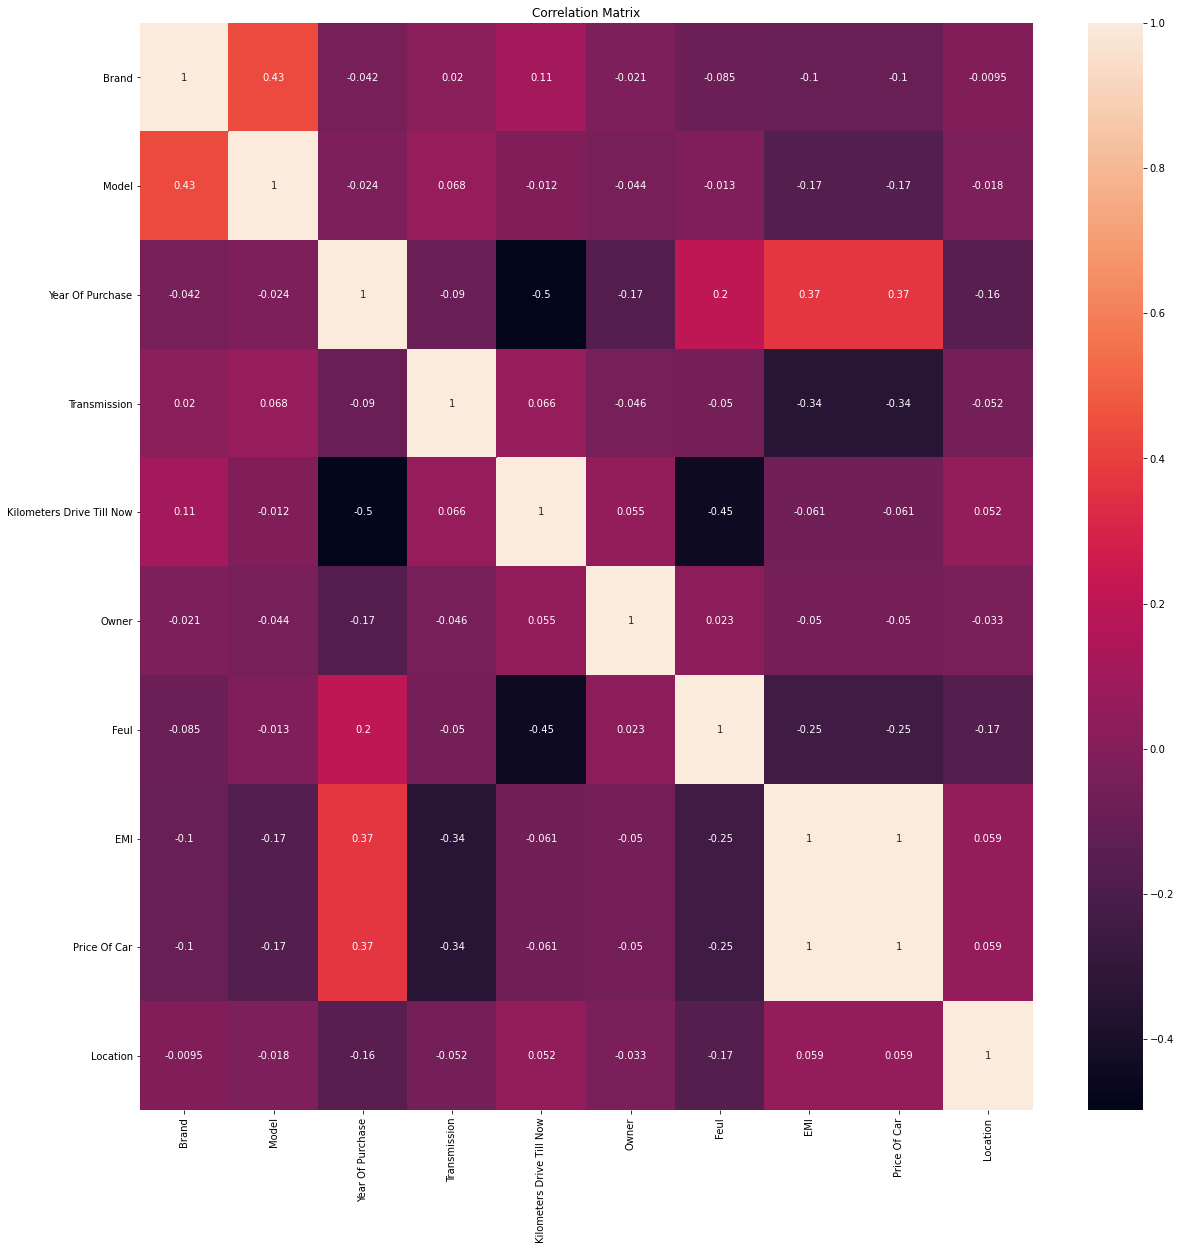

In [302]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[20,20])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

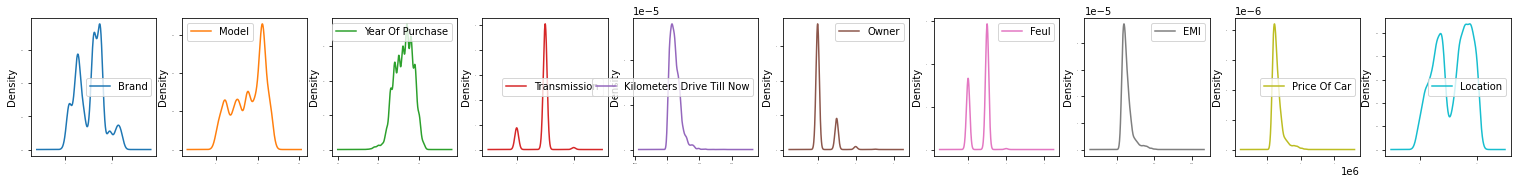

In [303]:
df.plot(kind='density',subplots=True,layout=(10,15),sharex=False,fontsize=1,figsize=(40,30))
plt.show()

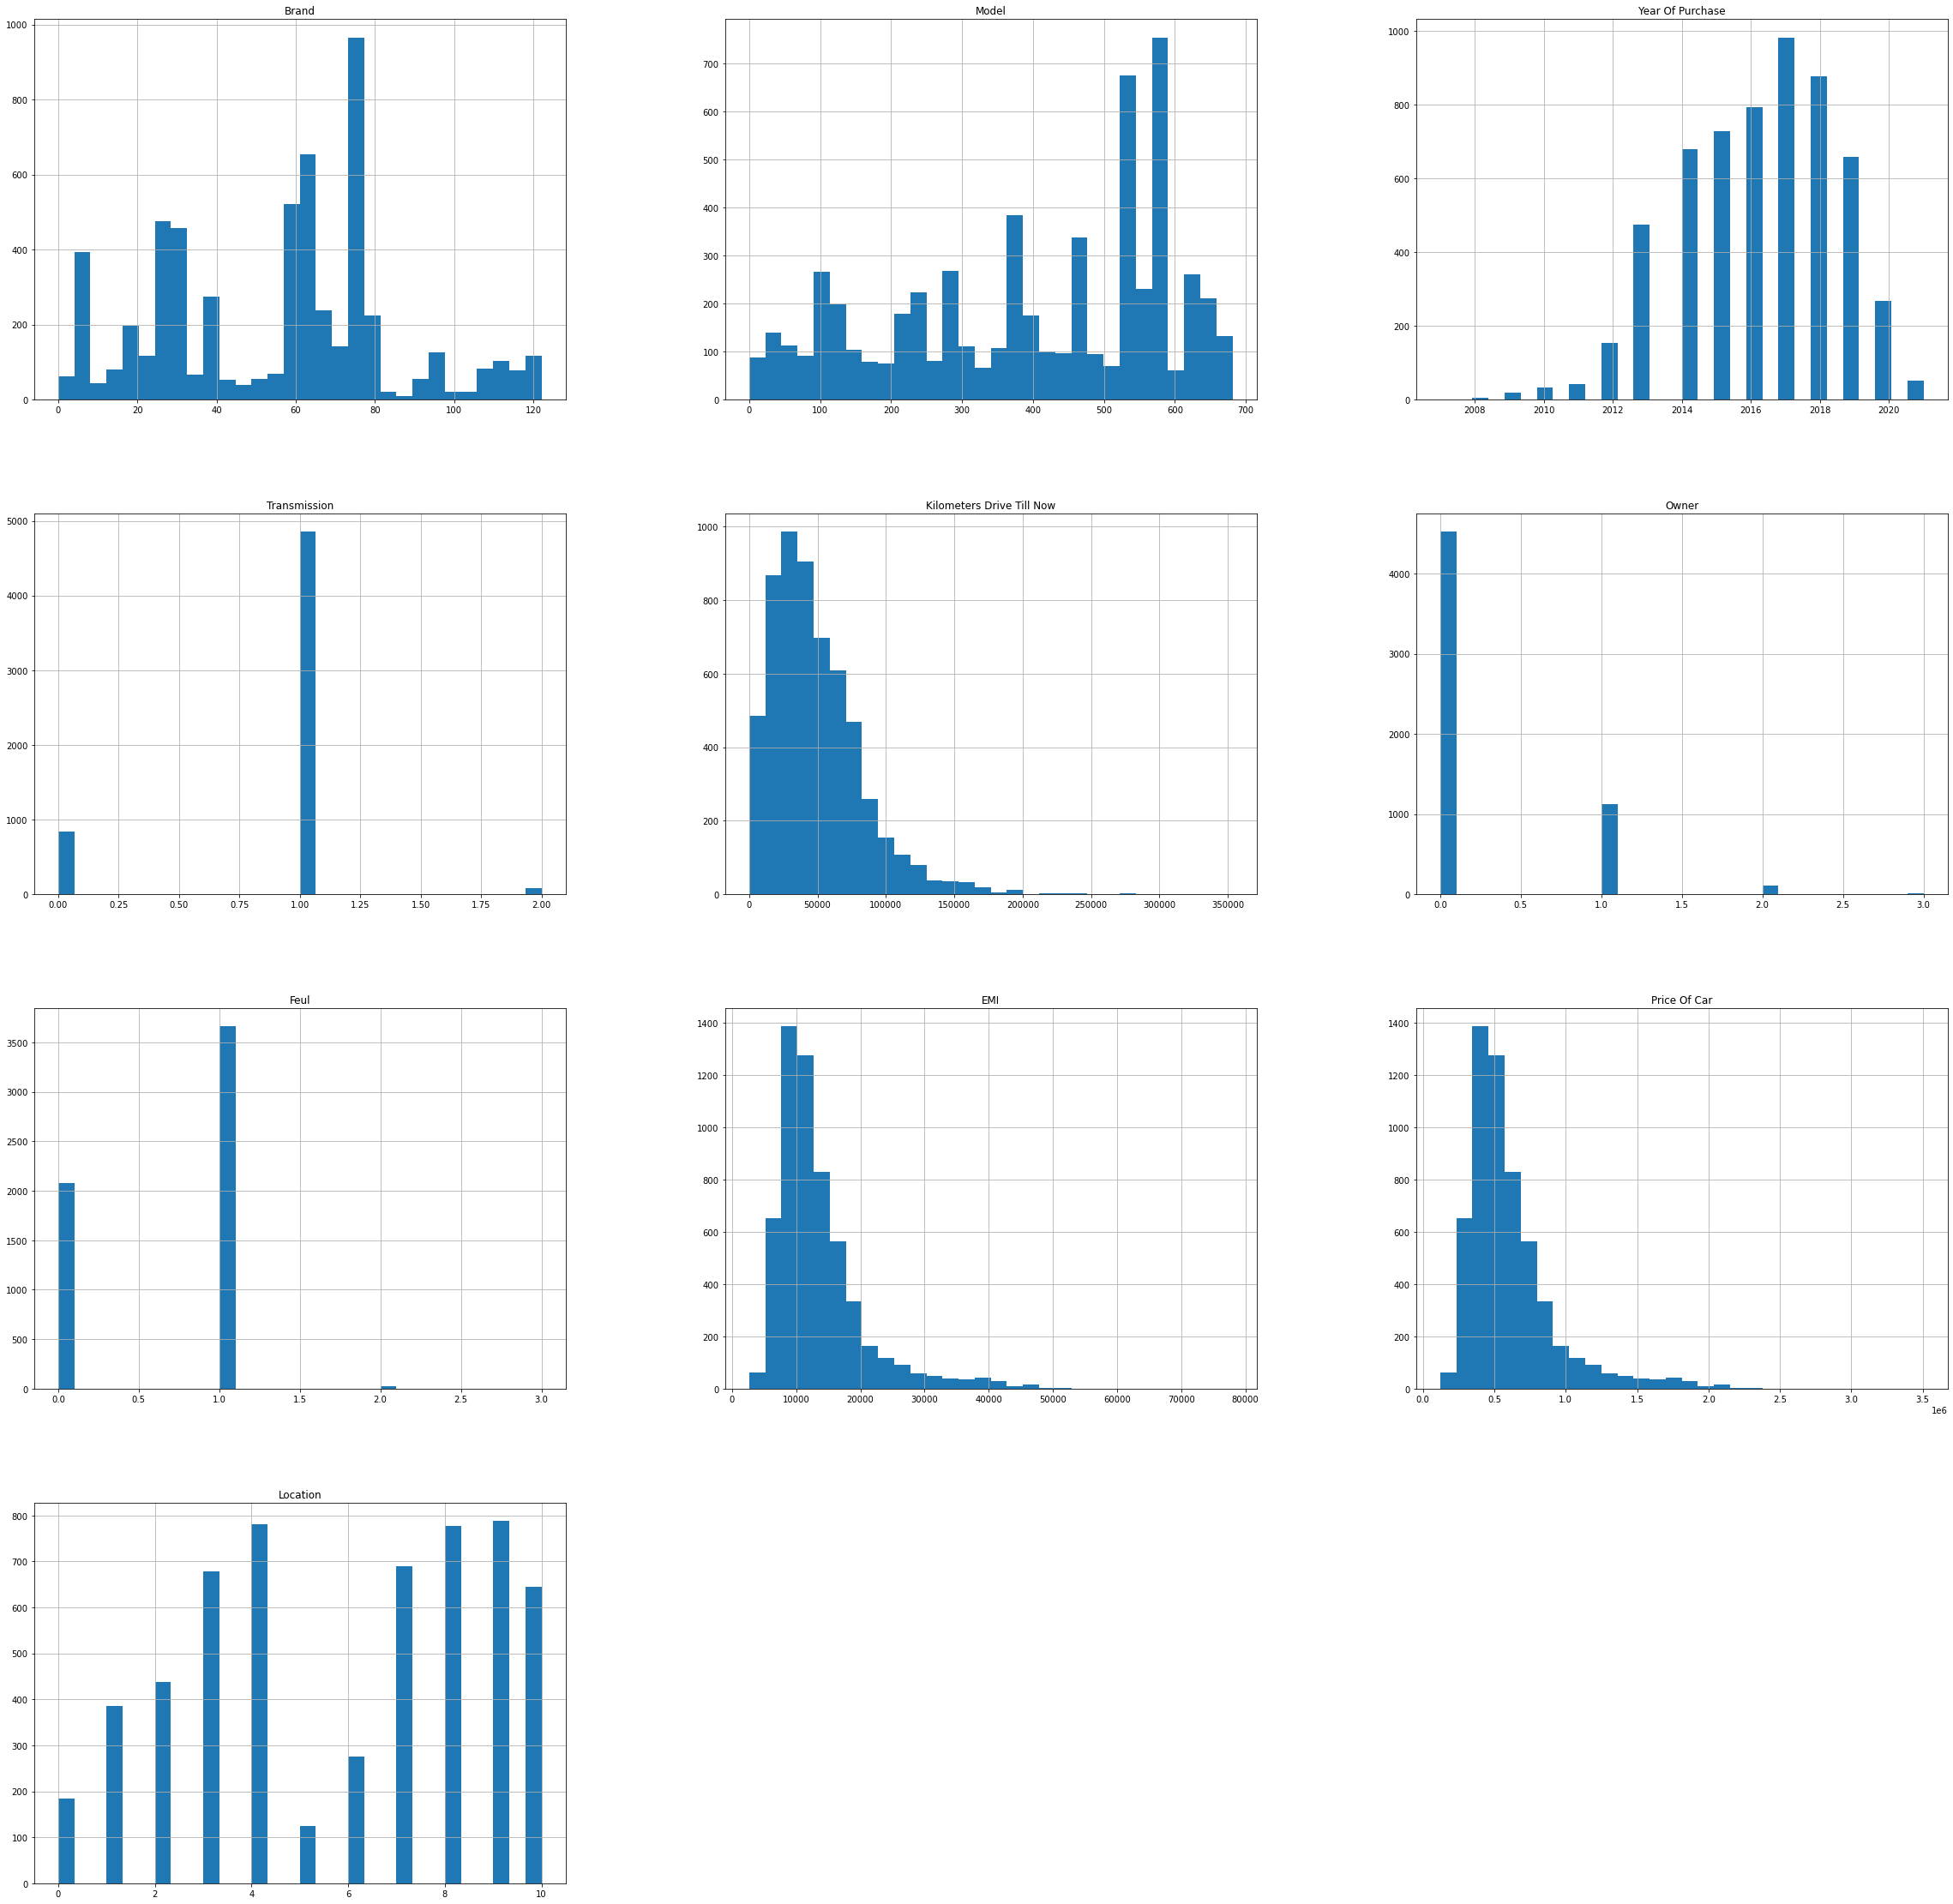

In [304]:
df.hist(bins=30,figsize=(40,40))
plt.show()

In [305]:
# Checking Skweness
df.skew().sort_values(ascending=False) # For descending

EMI                          2.187803
Price Of Car                 2.187801
Owner                        2.029403
Kilometers Drive Till Now    1.482939
Brand                        0.133140
Location                    -0.211370
Year Of Purchase            -0.328752
Model                       -0.450843
Feul                        -0.460569
Transmission                -1.396733
dtype: float64

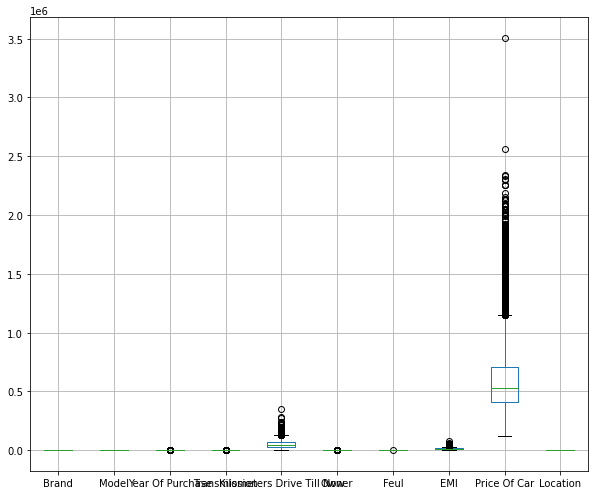

In [306]:
# Checking Outliers in data
# Plot boxplot
df.boxplot(figsize=[10,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [307]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(5765, 10)

In [318]:
threshold=2.5
print(np.where(z>2.5))

(array([  10,   19,   28,   28,   33,   33,   35,   35,   36,   36,   37,
         39,   39,   41,   41,   43,   43,   49,   49,   50,   50,   52,
         55,   55,   65,   66,   66,   69,   69,   78,   78,   80,   80,
        115,  115,  124,  124,  125,  129,  147,  155,  160,  160,  169,
        180,  180,  209,  216,  236,  243,  243,  244,  250,  251,  256,
        266,  281,  290,  293,  293,  293,  294,  294,  303,  318,  321,
        327,  334,  335,  339,  339,  342,  343,  344,  357,  357,  361,
        361,  372,  372,  372,  377,  381,  395,  422,  456,  466,  478,
        478,  481,  485,  486,  489,  502,  513,  513,  529,  543,  543,
        584,  654,  675,  744,  749,  757,  758,  770,  789,  816,  816,
        817,  819,  819,  823,  833,  847,  850,  868,  869,  875,  877,
        877,  882,  884,  887,  890,  890,  896,  896,  899,  899,  913,
        913,  950,  951,  952,  955,  955,  957,  959,  968,  972,  976,
        980,  981,  981,  984,  984,  985,  987,  

In [319]:
df_new=df[(z<2.5).all(axis=1)]
print(df.shape)
print(df_new.shape)

(5765, 10)
(5162, 10)


In [320]:
# % data loss
loss_percent=(5765-5162)/5765*100
print(loss_percent)

10.459670424978318


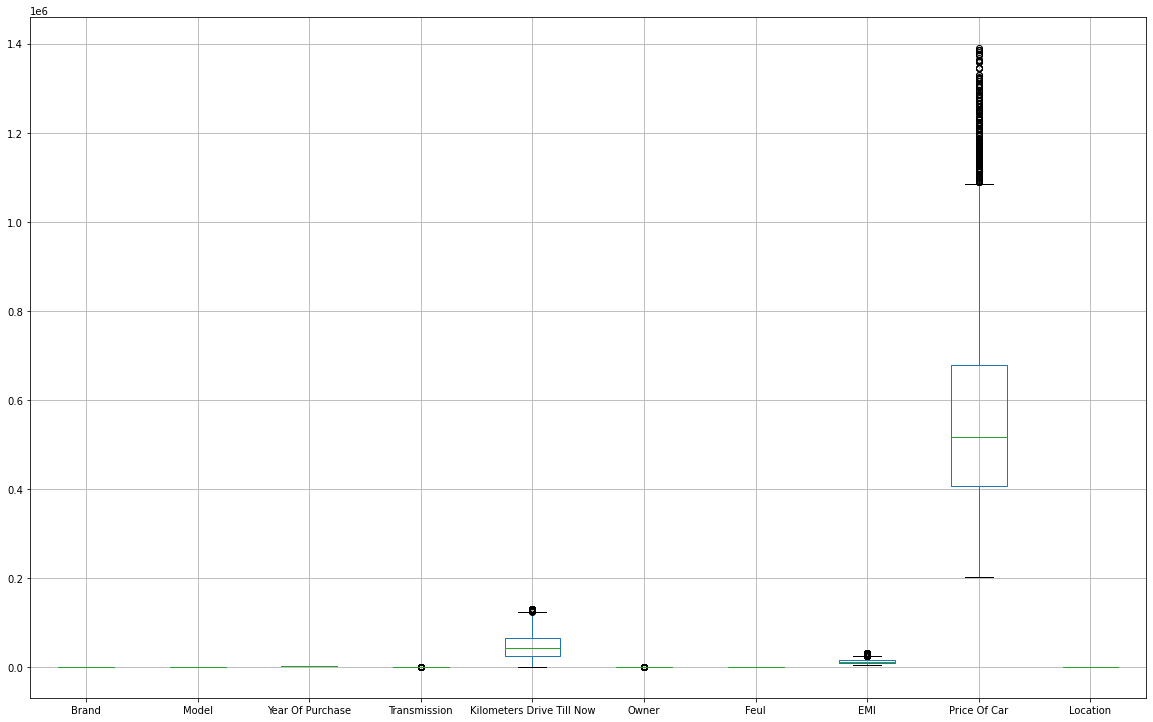

In [321]:
# Checking Outliers in data
# Plot boxplot
df_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [322]:
x=df_new.drop(['Price Of Car'],axis=1)
y=df_new['Price Of Car']

In [323]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [324]:
for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.9999999965123538
At Random State 0, the training accuracy is :- 0.9999999964252547


At Random State 1, the training accuracy is :- 0.9999999965231999
At Random State 1, the training accuracy is :- 0.9999999963771562


At Random State 2, the training accuracy is :- 0.9999999964837095
At Random State 2, the training accuracy is :- 0.9999999965367863


At Random State 3, the training accuracy is :- 0.9999999965755677
At Random State 3, the training accuracy is :- 0.999999996161556


At Random State 4, the training accuracy is :- 0.9999999964895916
At Random State 4, the training accuracy is :- 0.9999999965188862


At Random State 5, the training accuracy is :- 0.999999996464482
At Random State 5, the training accuracy is :- 0.9999999966101512


At Random State 6, the training accuracy is :- 0.9999999965880028
At Random State 6, the training accuracy is :- 0.9999999960836072


At Random State 7, the training accuracy is :- 0.999999996497492

In [325]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(5,20):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 5 the cv score is  0.9999999962960103 and accuracy score for training is 0.9999999964487212 and accuracy score for testing is 0.9999999966792197


At cross fold 6 the cv score is  0.9999999962249784 and accuracy score for training is 0.9999999964487212 and accuracy score for testing is 0.9999999966792197


At cross fold 7 the cv score is  0.9999999961955709 and accuracy score for training is 0.9999999964487212 and accuracy score for testing is 0.9999999966792197


At cross fold 8 the cv score is  0.9999999962484261 and accuracy score for training is 0.9999999964487212 and accuracy score for testing is 0.9999999966792197


At cross fold 9 the cv score is  0.9999999961171446 and accuracy score for training is 0.9999999964487212 and accuracy score for testing is 0.9999999966792197


At cross fold 10 the cv score is  0.9999999959409811 and accuracy score for training is 0.9999999964487212 and accuracy score for testing is 0.9999999966792197


At cross fold 11 the cv score is 

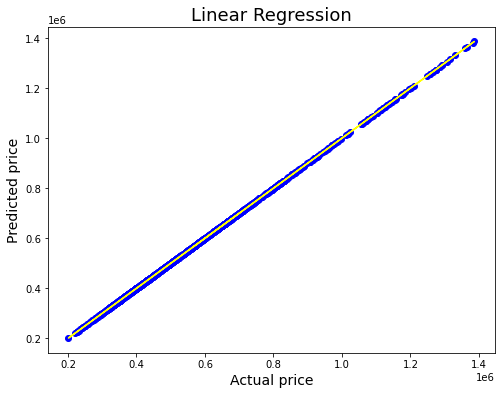

In [326]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='blue')
plt.plot(y_test,y_test,color='yellow')
plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [327]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [328]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9999999966769391

In [329]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

99.99999962948898

In [330]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.9944105762619023

In [331]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_1=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_1

,original,predicted
0,565799,565803.635538
1,853599,853606.902556
2,519399,519410.318831
3,735399,735419.655779
4,486199,486186.572221
...,...,...
1028,438699,438716.109609
1029,295199,295219.268668
1030,684699,684710.837472
1031,467399,467397.809830


In [332]:
# Model Saving
import pickle
filename = 'Car Price Prediction.pkl'
pickle.dump(lr,open(filename,'wb'))

# Thank you...!!!